In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCBRXC5/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCBRXC5/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCBRXC5/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [6]:
print(tokenizer.subwords[:50])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_']


In [7]:
sample_string =  'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)

tokenized_string

[6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]

In [8]:
original_string = tokenizer.decode(tokenized_string)
original_string

'TensorFlow, from basics to mastery'

In [9]:
for ts in tokenized_string:
    print(ts,tokenizer.decode([ts]))

6307 Ten
2327 sor
4043 Fl
2120 ow
2 , 
48 from 
4249 basi
4429 cs 
7 to 
2652 master
8050 y


In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [13]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 7s 18ms/step - loss: 0.6776 - accuracy: 0.5870 - val_loss: 0.6303 - val_accuracy: 0.7209
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 0.5162 - accuracy: 0.8025 - val_loss: 0.4380 - val_accuracy: 0.8324
Epoch 3/10
391/391 [==============================] - 7s 18ms/step - loss: 0.3565 - accuracy: 0.8723 - val_loss: 0.3533 - val_accuracy: 0.8640
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.2892 - accuracy: 0.8960 - val_loss: 0.3221 - val_accuracy: 0.8749
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 0.2488 - accuracy: 0.9114 - val_loss: 0.3100 - val_accuracy: 0.8790
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 0.2240 - accuracy: 0.9194 - val_loss: 0.3053 - val_accuracy: 0.8814
Epoch 7/10
391/391 [==============================] - 7s 18ms/step - loss: 0.2055 - accuracy: 0.9264 - val_loss: 0.3059 - val_accuracy: 0.8816

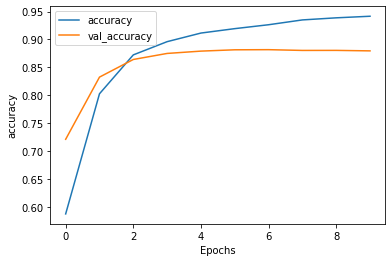

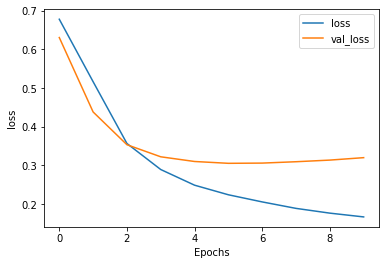

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
e = model.layers[0]

In [24]:
e.get_weights()[0].shape

(8185, 64)

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
sentences = ['this was soooo awesome!!!', 'that season finale sucked']
sequences = [tokenizer.encode(sentence) for sentence in sentences]
sequences

[[14, 18, 325, 766, 222, 7073, 3295], [13, 2823, 4838, 7961, 5532]]

In [30]:
padded = pad_sequences(sequences=sequences, maxlen=64,padding='post', truncating='post')

In [31]:
padded

array([[  14,   18,  325,  766,  222, 7073, 3295,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  13, 2823, 4838, 7961, 5532,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [32]:
model.predict(padded)

array([[0.99976534],
       [0.00556705]], dtype=float32)